In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import data
df = pd.read_csv('penguins_binary_classification.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,2007


**Note:** The 'species' column is going to be our response variable.

In [3]:
print('The two species in our dataset are ' + list(df.species.unique())[0] + ' and ' + list(df.species.unique())[1] + ".")

The two species in our dataset are Adelie and Gentoo.


### Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            274 non-null    object 
 1   island             274 non-null    object 
 2   bill_length_mm     274 non-null    float64
 3   bill_depth_mm      274 non-null    float64
 4   flipper_length_mm  274 non-null    float64
 5   body_mass_g        274 non-null    float64
 6   year               274 non-null    int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 15.1+ KB


In [5]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,274.000000,274.000000,274.000000,274.000000,274.000000
mean,42.702920,16.836131,202.178832,4318.065693,2008.043796
std,5.195566,2.013410,15.047938,835.933105,0.806281
min,32.100000,13.100000,172.000000,2850.000000,2007.000000
25%,38.350000,15.000000,190.000000,3600.000000,2007.000000
50%,42.000000,17.000000,198.000000,4262.500000,2008.000000
75%,46.675000,18.500000,215.000000,4950.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [6]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
year                 0
dtype: int64

In [7]:
df.duplicated().sum()

0

**Note:** After a quick look at our data, we can see that the dataset is rather small and does not have any missing values or duplicates.

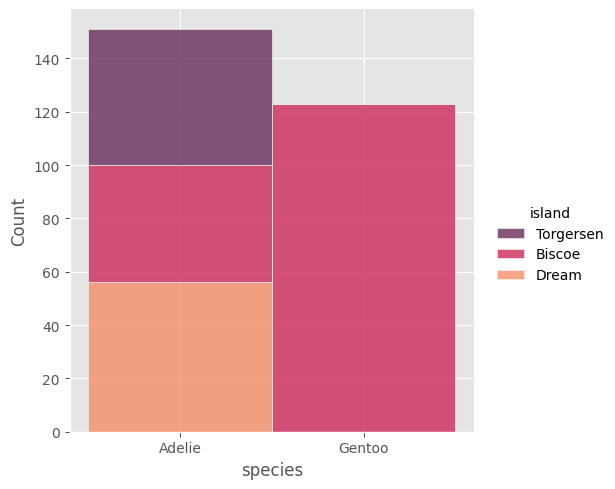

In [8]:
# Plot distribution of the 'species' variable in regards to the 'island' variable
plt.style.use('ggplot')
sns.displot(data=df, x='species', hue='island', multiple='stack', palette='rocket');

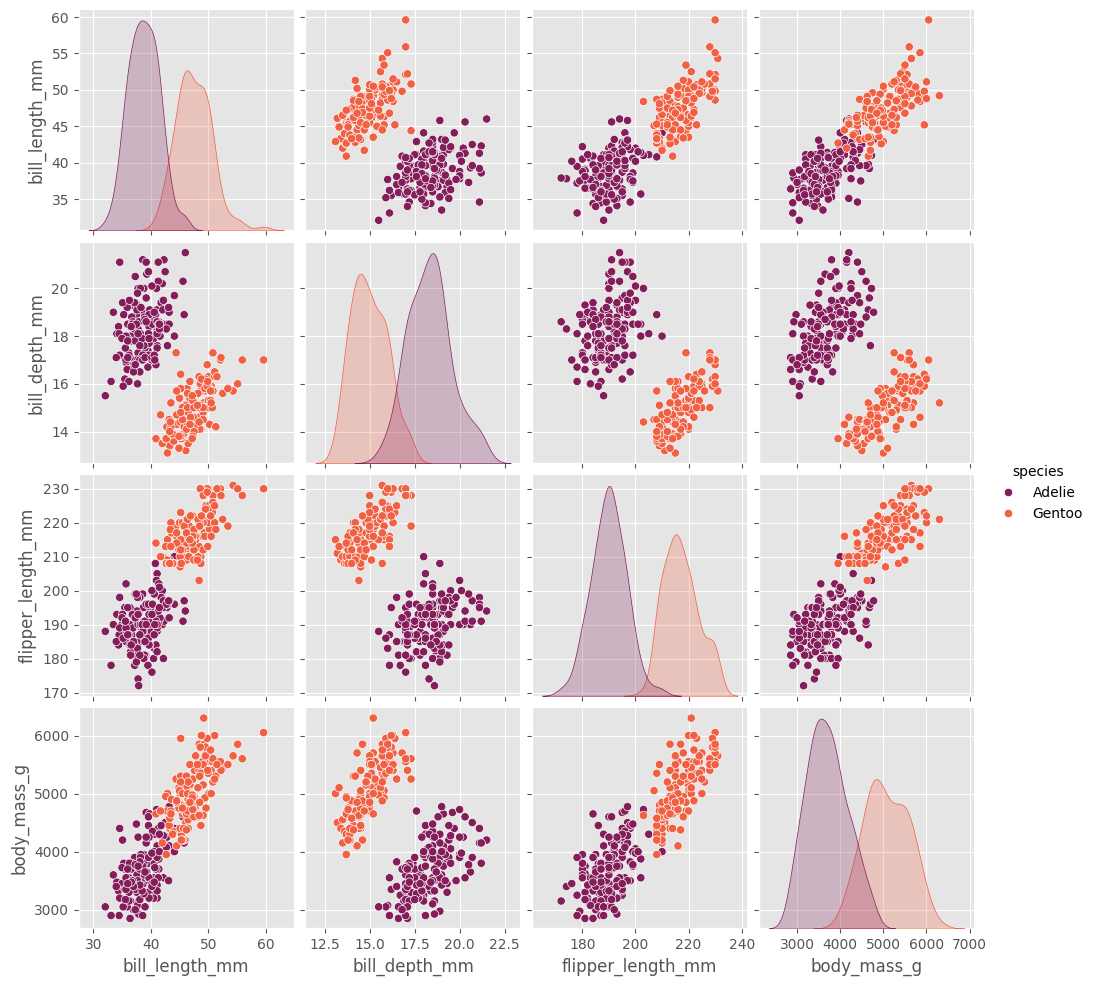

In [9]:
# Plot pairwise bivariate distributions
sns.pairplot(data=df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species']], hue='species', palette='rocket');

**Note:** The graph above clearly shows how different the characteristics of each species are.

<Axes: >

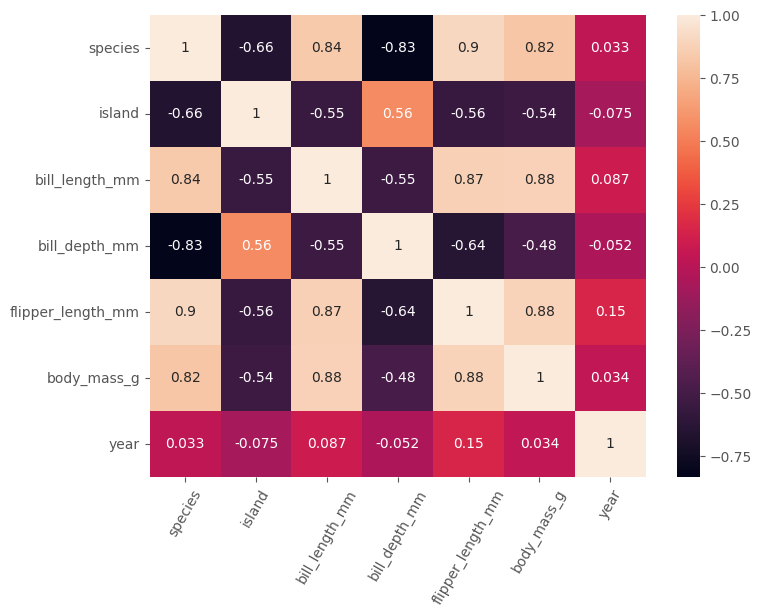

In [10]:
# Plot correlation matrix
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df['island'] = le.fit_transform(df['island'])
plt.figure(figsize=(8,6))
plt.xticks(rotation=60)
sns.heatmap(df.corr(), annot=True)

**Note:** The correlation matrix above shows that the 'species' variable seems to be strongly correlated with the 'bill length', 'flipper length' and 'body mass' variables.

### Fitting the model

In [11]:
# Separate the predictors from the response variable
X = df.drop(columns=['species'], axis=1)
y = df['species']

In [12]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Scale data
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train))
X_test = pd.DataFrame(sc.transform(X_test))

In [14]:
# Fit a Logistic Regression model
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [15]:
# Get predictions
y_pred = lr.predict(X_test)

### Results

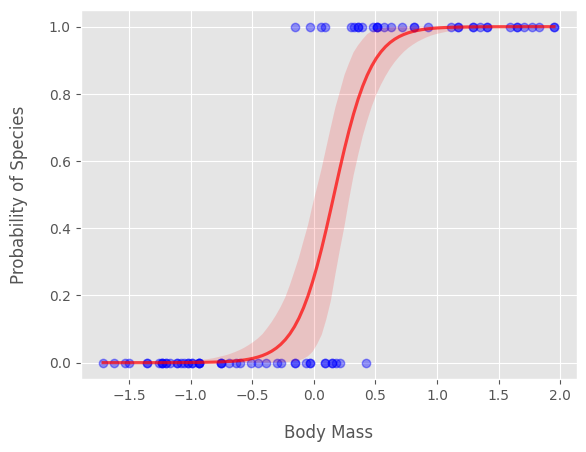

In [16]:
# Plot predicted probabilities of 'species' in regards to the 'body_mass' variable
df_plot = pd.concat([pd.DataFrame(y_pred), X_test], axis=1, ignore_index=True)
ax = sns.regplot(x=df_plot[5],
                 y=df_plot[0],
                 logistic=True, 
                 scatter_kws={'color': 'blue', 'alpha':0.4}, 
                 line_kws={'color': 'red', 'alpha':0.7})
ax.set(xlabel='Body Mass', ylabel='Probability of Species')
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 15
plt.show();

In [17]:
# Get coefficient estimates
coefs = list(lr.intercept_)
coefs += lr.coef_.tolist()[0]

table_index = ['Intercept']
table_index += list(df.drop('species', axis=1).columns)

table_coefs = pd.DataFrame(coefs, index=table_index, columns=['Coefficient Estimates'])
table_coefs

,Coefficient Estimates
Intercept,-0.433433
island,-0.780399
bill_length_mm,1.077996
bill_depth_mm,-1.851774
flipper_length_mm,1.434851
body_mass_g,1.059688
year,-0.265535


In [18]:
print('Classification report', classification_report(y_test, y_pred))

Classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        35

    accuracy                           1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83



In [19]:
print('Accuracy of our model:', accuracy_score(y_test, y_pred))

Accuracy of our model: 1.0


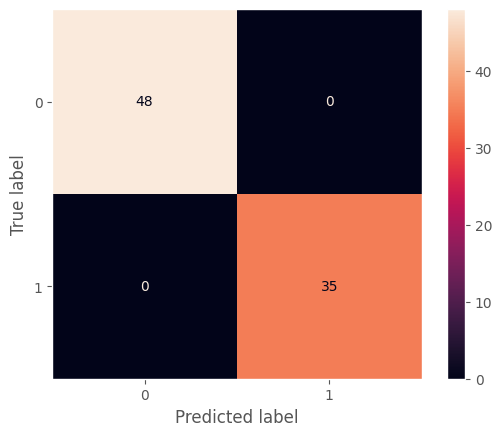

In [20]:
# Plot confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot(cmap='rocket')
plt.grid(False)
plt.show()